## **Word Cloud**
A word cloud is a pictorial way of capturing the most significant words in a given document. it is nothing but an image composed of words, in different zones, from the text under consideration, where the size of the word is proportional to its importance (frequency) in teh text. It is a way to understand the key terms in a corpus.

In [ ]:
#Importing the data
from google.colab import files
uploaded = files.upload()

Saving sts_gold_tweet.csv to sts_gold_tweet.csv


In [ ]:
import pandas as pd

df_tweets = pd.read_csv("sts_gold_tweet.csv", delimiter=";")

In [ ]:
df_tweets.head(10)

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...
6,1964951623,0,"got a sniffle, got the kids and hubby just lef..."
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...
8,1753802024,0,xboxtweet not working again
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...


In [ ]:
df_tweets.shape

(2034, 3)

In [ ]:
# adding teh 284 tweets into a list
corpus_split = list(df_tweets['tweet'])

In [ ]:
# helper funtion which concatenates all the data into a single corpus
def concatenate_list_data(list):
  result= ''
  for element in list:
    result += str(element)
  return result

In [ ]:
corpus_twitter = concatenate_list_data(corpus_split)
corpus_twitter[:10000]

"the angel is going to miss the athlete this weekend It looks as though Shaq is getting traded to Cleveland to play w/ LeBron... Too bad for Suns' fans. The Big Cactus is no more @clarianne APRIL 9TH ISN'T COMING SOON ENOUGH drinking a McDonalds coffee and not understanding why someone would hurt me for no apparent reason. So dissapointed Taylor Swift doesnt have a Twitter Wishes I was on the Spring Fling Tour with Dawn &amp; neecee Sigh  G'knightgot a sniffle, got the kids and hubby just left to work in Sydney for the weekend, boo hoo i've only been in sydney for 3 hrs but I miss my friends  especially @ktjade!!!xboxtweet not working again R.I.P to lebron/kobe puppet commercials... Allergies sucks sometimes. Theres a super adorable 9 month old beagle named Sydney hanging out with my roomie and his friend. Can't pet. has a broken iphone Line at McDonalds was too long so I can't get my sausage biscuit on @stephnewby there is a virus going around  congestion, throw up, &amp; high feverI 

In [ ]:
# load text
# split into words by white space
corpus_twitter = corpus_twitter.split()

In [ ]:
# remove punctuation from each word
import string

table = str.maketrans('', '', string.punctuation)
stripped_twitter = [w.translate(table) for w in corpus_twitter]

In [ ]:
# detokenizing all teh words
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(stripped_twitter)

'the angel is going to miss the athlete this weekend It looks as though Shaq is getting traded to Cleveland to play w LeBron Too bad for Suns fans The Big Cactus is no more clarianne APRIL 9TH ISNT COMING SOON ENOUGH drinking a McDonalds coffee and not understanding why someone would hurt me for no apparent reason So dissapointed Taylor Swift doesnt have a Twitter Wishes I was on the Spring Fling Tour with Dawn amp neecee Sigh Gknightgot a sniffle got the kids and hubby just left to work in Sydney for the weekend boo hoo ive only been in sydney for 3 hrs but I miss my friends especially ktjadexboxtweet not working again RIP to lebronkobe puppet commercials Allergies sucks sometimes Theres a super adorable 9 month old beagle named Sydney hanging out with my roomie and his friend Cant pet has a broken iphone Line at McDonalds was too long so I cant get my sausage biscuit on stephnewby there is a virus going around congestion throw up amp high feverI scratched my iPod I dont understand I 

In [ ]:
# appending all the data in the list to a string
string_twitter = '  '
string_twitter = string_twitter.join(stripped_twitter)

In [ ]:
# importing necessary nltk packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# setting stopwords to english
stop_words = set(stopwords.words('english'))

# tokenizing the string
word_tokens_twitter = word_tokenize(string_twitter)

In [ ]:
# removing all the stopwords
filtered_corpus_twitter = [w for w in word_tokens_twitter if not w in stop_words]

In [ ]:
# calculating the frequency of each word
wordfreq_twitter = [filtered_corpus_twitter.count(p) for p in filtered_corpus_twitter]
result_twitter = dict(zip(filtered_corpus_twitter, wordfreq_twitter))

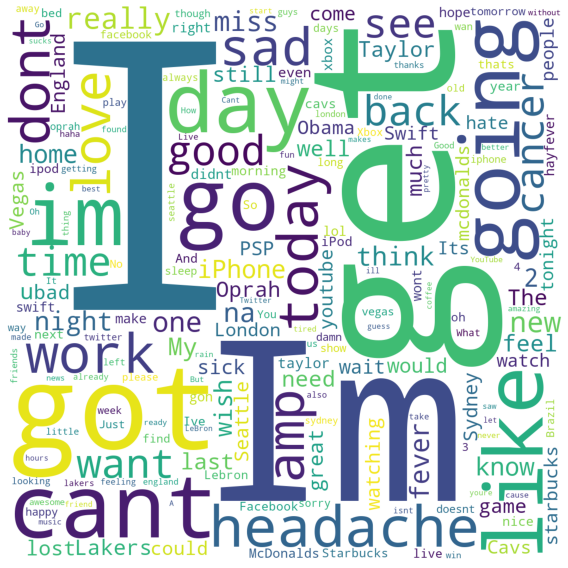

In [ ]:
# plot the wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1200, height=1200, background_color='white', min_font_size=10).generate_from_frequencies(result_twitter)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()

plt.show()

In [ ]:
# custom word cloud
from PIL import Image
import numpy as np
import urllib
import requests

def generate_wordcloud(words, mask):
  wordcloud = WordCloud(width=1200, height=1200, background_color='white', min_font_size=10, mask=mask).generate_from_frequencies(words)
  plt.figure(figsize=(8,8), facecolor='white', edgecolor='blue')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()


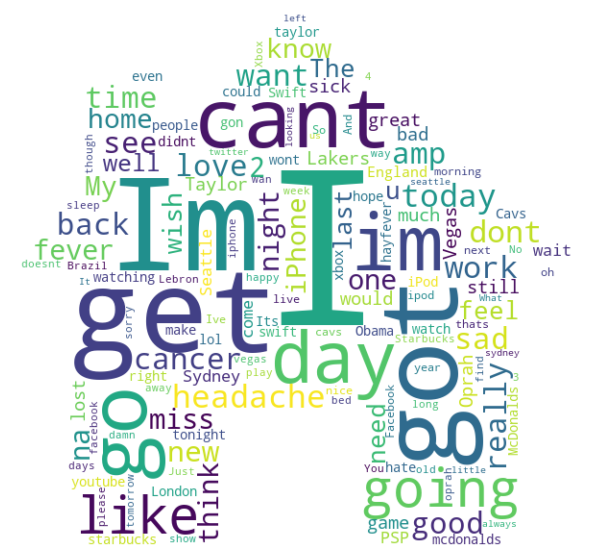

In [ ]:
mask_house = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))
generate_wordcloud(result_twitter, mask_house)